In [14]:
import mglearn
import sklearn
from sklearn.datasets import load_breast_cancer, load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from mlxtend.classifier import Adaline
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.special import expit

# Supervised Learning


An example of synthetic dataset is return by the package mglearn (already installed as requirement) by the method make_forge()

X.shape: (26, 2)


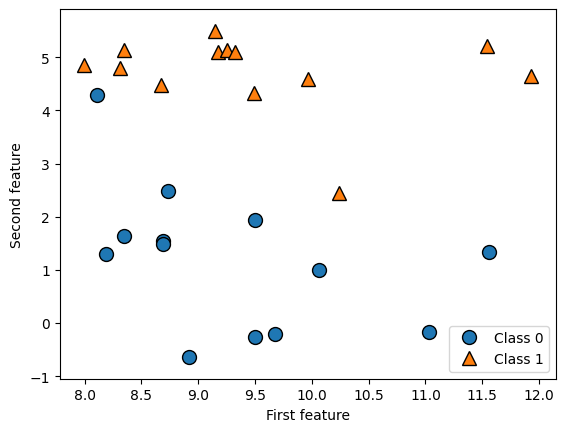

In [15]:
# generate dataset

X, y = mglearn.datasets.make_forge()

# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

The task is to learn model; learn a curve that is label that can identify label as belonging to Class 1 or Class 2.

We complement the synthetic dataset with real-world example, i.e. the Wisconsin Breast Cancer Dataset which records breast cancer tumors. Each tumor is benign or malignant. THe supervised task is to predict whether a tumor is malignant based on the measurements of the tissue.

In [16]:
cancer = load_breast_cancer()
print(f"cancer.keys():\n {cancer.keys()}")

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [17]:
print(f"Shape of cancer datat: {cancer.data.shape}")
# 30 features, 569 entries

Shape of cancer datat: (569, 30)


In [18]:
print("Sample counts per class:\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [19]:
print(f"Feature names:\n {cancer.feature_names}")

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Firstly, we focus on a fundamental issue in the supervised learning setting. If we train model on the entire dataset we are not able to evaluate the capacity of generalization of the model and its performance on unseen data.

To reproduce a more realistic situation relying only on the data we have, we split the dataset into two disjoint and separate sets:
- Training set
- Test set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, # we must split the dataset
                                                    stratify=y, # must be the vector of the labels
                                                    test_size=0.2,
                                                    random_state=42)

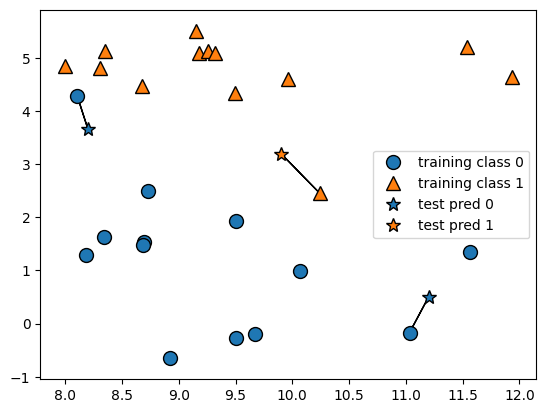

In [21]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

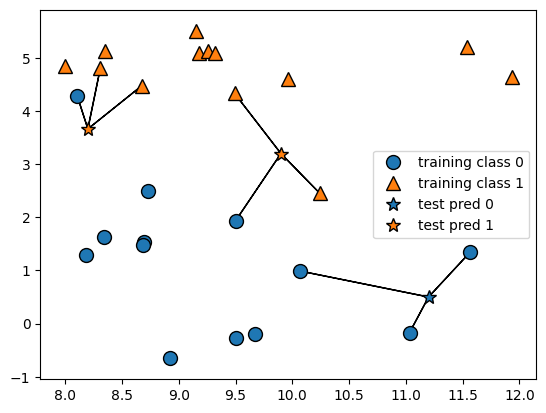

In [22]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In general, the idea is to represent the data to get the nearest neighbor in an efficient way, and then to apply the aggregation function.

In SKLearn, module sklearn.neighbors provides functionality for unsupervised and supervised neighbors-based learning methods. SKLearn implements two different classifiers:
- KNeighborsClassifier implements learning based on the nearest neighbors of each query point, where n_neighbors is an integer value specified by the user.
- RadiusNeighborsClassifier implements learning based on the number of neighbors within a fixed radius of each training point, where is a floating-point value specified by the user.

The neighbors classification in KNeighborsClassifier is the most commonnly used technique and it is the subject of this section.


In [23]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

We can show the prediction for all possible test points in the xy-plane and highlight the decision boundary which divide between where algorithm identifies the class 0 and the region assigned to the class 1.

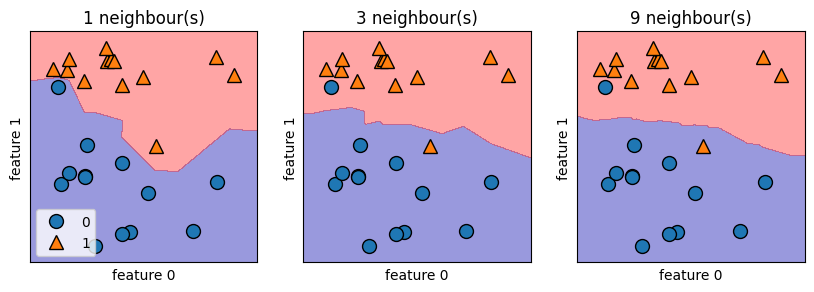

In [24]:
# difference in decision boundary with increasement of k

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbour(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)

- The line separating blue and red areas is not a decision boundary but an approximation of it.
- There is a classification error for k = 3, 9.
- In the first case the complexity is higher.

A single neighbor results in a decision boundary that follows the data in the training set closely. Increasing the number of neighbors, we get a smotther decision boundary, i.e. a simpler model:

- few neighbors => higher model complexity
- more neighbors => lower model complexity

We want to keep KNN, we have a case of generalization. One of the best ways is to increase the number of neighbors.

In the case of real data:

In [25]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

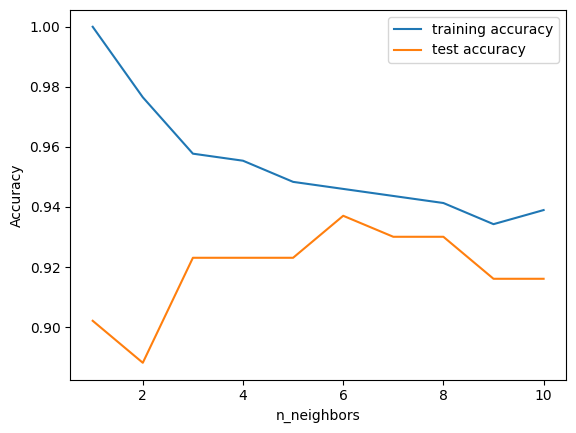

In [26]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1 , 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Query for k-nearest neighbours. Given a point I would like to get k nearest neighbours. KDTree implements the algorithm, takes all the points and leaf_size (how many points do we want to put in each region of KDTree).
Method query returns k nearest neighbors.

dist - vector of distances, ind - vector of indexes.
We have to use indexes to get points from dataset. Select all points for which indexes are in the array ind.

In [27]:
tree = KDTree(X, leaf_size=3)
dist, ind = tree.query([X[0,:]], k=3)

print(f'Query point: {[X[0,:]]}')
print(f'Nearest neighbours:\n {X[ind, :]}')
print(f'Distances from the query point: {dist}')

Query point: [array([9.96346605, 4.59676542])]
Nearest neighbours:
 [[[9.96346605 4.59676542]
  [9.49123469 4.33224792]
  [9.32298256 5.09840649]]]
Distances from the query point: [[0.         0.54126885 0.81354955]]


Query for neighbours within a given radius r.

In [29]:
tree = KDTree(X, leaf_size=2) # same info as before
print(f'Number of points within a radius 1: {tree.query_radius(X[:1], r=1, count_only=True)[0]}')
ind = tree.query_radius(X[:1], r=1) # query points and radius
print(f'Points: \n{X[ind[0], :]}')

Number of points within a radius 1: 5
Points: 
[[9.17748385 5.09283177]
 [9.25694192 5.13284858]
 [9.32298256 5.09840649]
 [9.49123469 4.33224792]
 [9.96346605 4.59676542]]
